In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from matplotlib.ticker import LogFormatter

In [71]:
alg_label = ["Original",
             "Lqdags"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [72]:
# box plots for each query
# TDO hacer un for para cada query y función y tamaño k
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]

datasets = []
file = "results-time-gradual.csv"
file_lqdags = "results-time-v2.csv"
print(file)

original = pd.read_csv(f'../../original/{file}',delimiter=';')
original = original.head(4)



lqdags = pd.read_csv(f'../../lqdags/{file_lqdags}',delimiter=';')


datasets = [original,
               lqdags]

#   print(i)
for j,query in enumerate(queries_label):
    data[j] = [original[query],
                     lqdags[query]] 

results-time-gradual.csv


In [73]:
datasets[0]

,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,0.234923,1.140383,0.000902,0.009728,0.375260,0.001810,0.093007,0.150442,0.025257,0.000438,0.008159,0.612290,0.000838,0.196469,7.385581,0.000623,0.001345
1,10,0.358422,2.075830,0.005427,0.036802,0.779743,0.004776,0.330888,0.232174,0.088260,0.000955,0.023519,1.129893,0.002495,0.282056,15.263027,0.001486,0.004237
2,100,0.412926,2.548862,0.007008,0.044597,1.365752,0.006519,0.340309,0.238808,0.088001,0.004112,0.035740,4.779751,0.005917,0.617773,17.090756,0.001641,0.004336
3,1000,0.445202,3.156619,0.008925,0.047140,1.397839,0.006499,0.338783,0.240053,0.088283,0.005516,0.078766,5.703115,0.013868,1.578391,19.090557,0.001741,0.005031


In [74]:
datasets[0]['k']

0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [75]:
colors = ['#de2d26', '#3f007d']#, 'darkturquoise', 'mediumspringgreen', 'lime']
#linestyles = ['--', ':']  # Different patterns

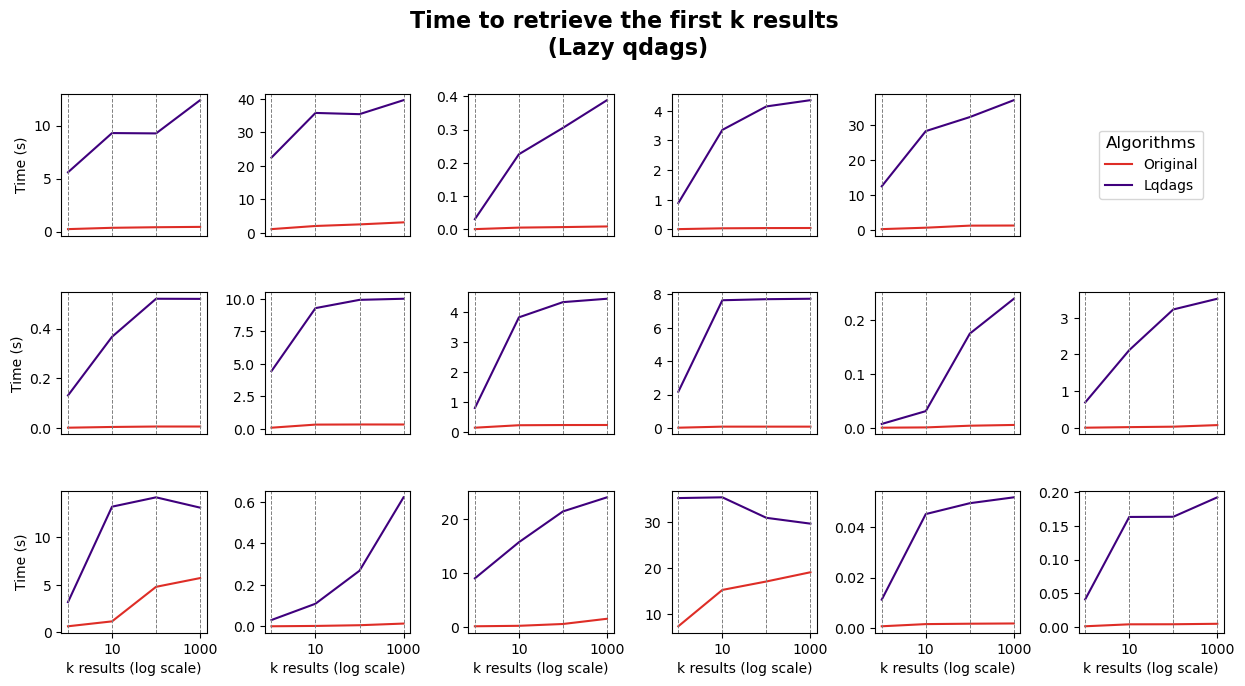

In [76]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.4, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])

j3.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
t4.set_ylabel('Time (s)')

t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != t4 and query != ti2 and query != ti3 and query != tr1 and query != tr2 and query != ti4):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=1.0)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-ppt.pdf')

plt.show()
 

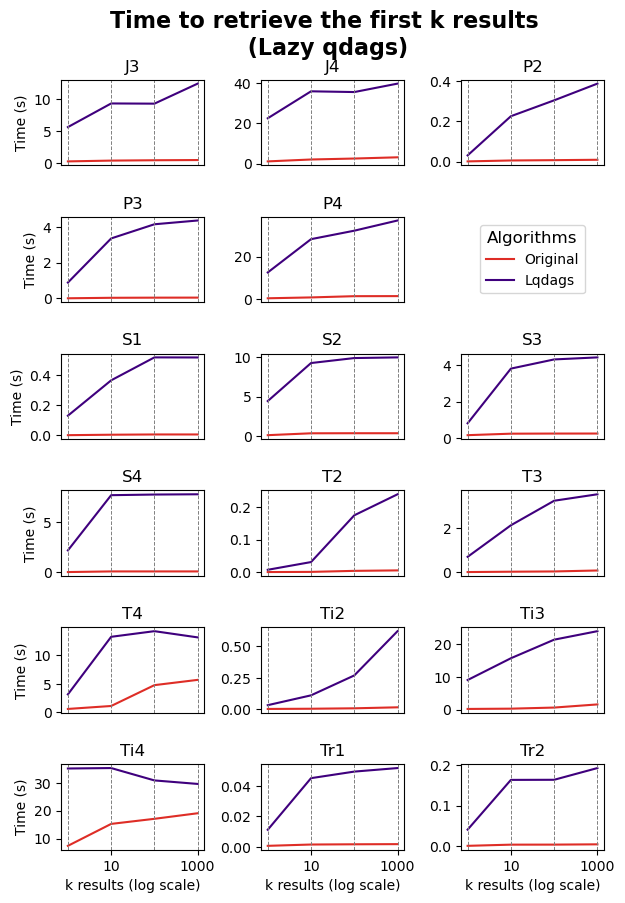

In [77]:
# Crear la figura
fig = plt.figure(figsize=(7, 10))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(6, 3, figure=fig, hspace=0.6, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[2, 0])
s2 = fig.add_subplot(gs[2, 1])
s3 = fig.add_subplot(gs[2, 2])

s4 = fig.add_subplot(gs[3, 0])
t2 = fig.add_subplot(gs[3, 1])
t3 = fig.add_subplot(gs[3, 2])

t4 = fig.add_subplot(gs[4, 0])
ti2 = fig.add_subplot(gs[4, 1])
ti3 = fig.add_subplot(gs[4, 2])

ti4 = fig.add_subplot(gs[5, 0])
tr1 = fig.add_subplot(gs[5, 1])
tr2 = fig.add_subplot(gs[5, 2])

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
s4.set_ylabel('Time (s)')
t4.set_ylabel('Time (s)')
ti4.set_ylabel('Time (s)')

tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != tr1 and query != tr2 and query != ti4):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=0.95)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-tesis.pdf')

plt.show()
 

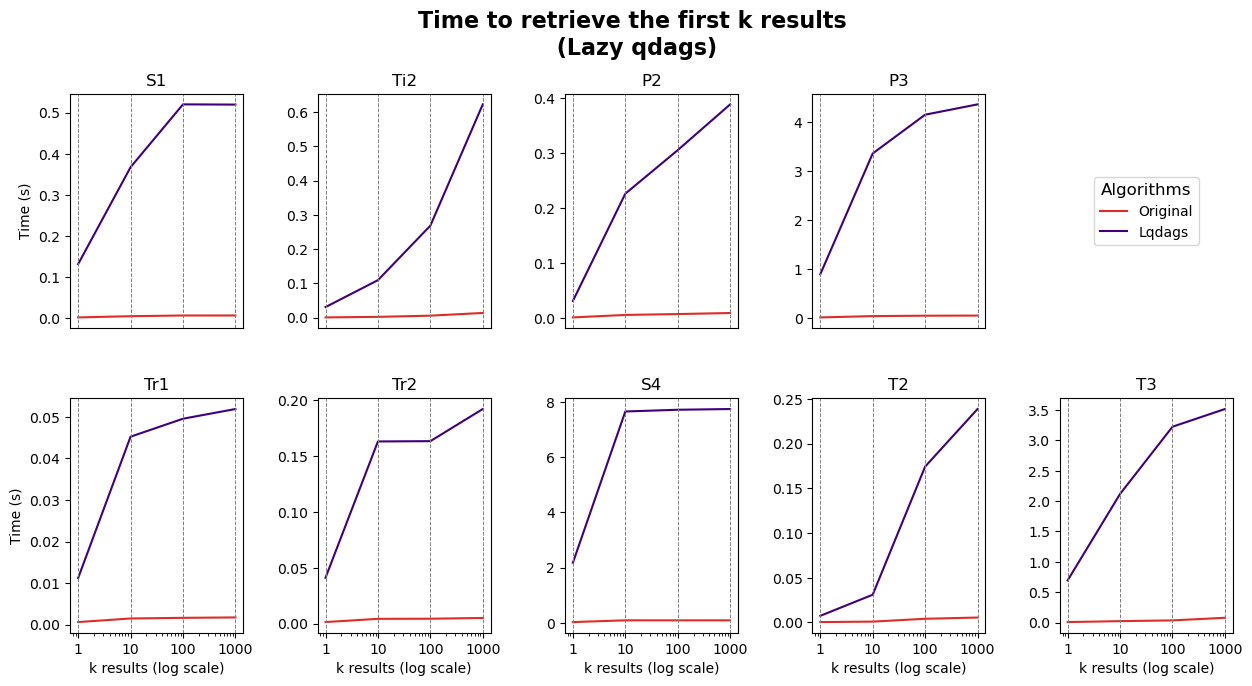

In [78]:
#ONLY THOSE NOT KILLED
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(2, 5, figure=fig, hspace=0.3, wspace=0.43)

# Añadir los subplots a la figura
#j3 = fig.add_subplot(gs[0, 0])
#j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
#p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 4]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[0, 0])
#s2 = fig.add_subplot(gs[1, 1])
#s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 2])
t2 = fig.add_subplot(gs[1, 3])
t3 = fig.add_subplot(gs[1, 4])

#t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[0, 1])
#ti3 = fig.add_subplot(gs[2, 2])
#ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[1, 0])
tr2 = fig.add_subplot(gs[1, 1])

s1.set_ylabel('Time (s)')
tr1.set_ylabel('Time (s)')


#ti2.set_xlabel('k results (log scale)')
s4.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
t2.set_xlabel('k results (log scale)')
t3.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title[i])
        query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
        query.xaxis.set_major_formatter(LogFormatter())
        #query.yaxis.set_major_formatter(LogFormatter())
        if(query != tr1 and query != tr2 and query != s4 and query != t2 and query != t3):
            query.axes.get_xaxis().set_visible(False)
        
handles, labels = s1.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=1.0)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-ppt.pdf')

plt.show()
 

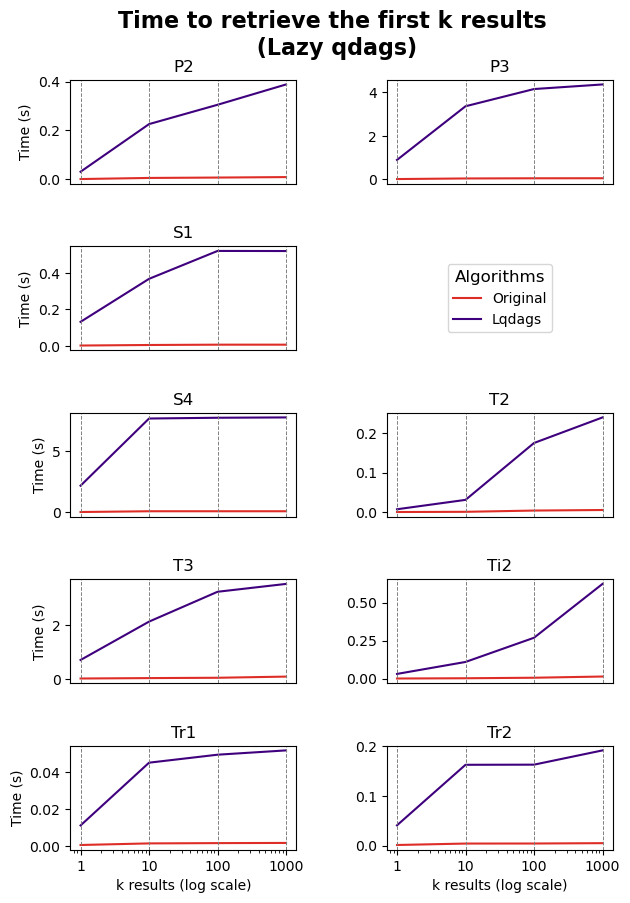

In [79]:
#ONLY THOSE NOT KILLED
# Crear la figura
fig = plt.figure(figsize=(7,10))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(5, 2, figure=fig, hspace=0.6, wspace=0.4)

# Añadir los subplots a la figura
#j3 = fig.add_subplot(gs[0, 0])
#j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 0])
p3 = fig.add_subplot(gs[0, 1])
#p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[1, 1]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
#s2 = fig.add_subplot(gs[1, 1])
#s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[2, 0])
t2 = fig.add_subplot(gs[2, 1])
t3 = fig.add_subplot(gs[3, 0])

#t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[3, 1])
#ti3 = fig.add_subplot(gs[2, 2])
#ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[4, 0])
tr2 = fig.add_subplot(gs[4, 1])

p2.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
s4.set_ylabel('Time (s)')
t3.set_ylabel('Time (s)')
tr1.set_ylabel('Time (s)')


#ti2.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title[i])
        query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
        query.xaxis.set_major_formatter(LogFormatter())
        #query.yaxis.set_major_formatter(LogFormatter())
        if(query != tr1 and query != tr2):
            query.axes.get_xaxis().set_visible(False)
        
handles, labels = s1.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=0.95)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-tesis.pdf')

plt.show()
 

In [80]:
## SECOND SCENARIO --> V1000

In [81]:

alg_label = ["Original",
            "Lqdags"]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T3","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"] # "s3", "t3","ti4"

In [82]:
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data_v1000 = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets_v1000 =[]

file = "results-time-gradual.csv"
file_lqdags = "results-v1000-time-v2.csv"
#print(file)

original = pd.read_csv(f'../../query1000results/original/{file}',delimiter=';')
original = original.head(4)
# Drop columns where all values are zero
original = original.loc[:, (original != 0).any(axis=0)]

lqdags = pd.read_csv(f'../../query1000results/lqdags/{file_lqdags}',delimiter=';')
# Drop columns where all values are zero
lqdags = lqdags.loc[:, (lqdags != 0).any(axis=0)]


datasets_v1000 = [original,
                     lqdags]

#   print(i)
for j,query in enumerate(queries_label_v1000):
    data_v1000[j] = [original[query],
                     lqdags[query]]
        

In [83]:
datasets_v1000[0]

,k,j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3,ti4
0,1,0.003076,0.002338,0.000272,0.003993,0.277091,0.000192,0.000355,0.000260,0.000293,0.000613,0.533535,14.477844
1,10,0.003522,0.002762,0.000363,0.006750,2.298997,0.000202,0.000559,0.000380,0.000741,0.000811,0.570852,14.534248
2,100,0.010523,0.032439,0.001259,0.010724,2.302349,0.000380,0.007117,0.027814,0.001495,0.002420,2.268375,29.046297
3,1000,0.077046,0.113053,0.007065,0.019845,2.279258,0.002176,0.013461,2.073800,0.024127,0.027749,3.256468,177.619607


In [84]:
datasets_v1000[1]

,k,j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3
1,0.235327,0.43352,0.000692,0.317437,10.1333,0.000254,0.000285,0.000521,0.001705,0.013619,10.7948,10.4717
10,0.249990,0.51486,0.004594,0.577034,76.0635,0.001010,0.008042,0.007631,0.085104,0.023966,15.3455,12.4432
100,0.940340,6.57678,0.042462,0.950264,78.6054,0.010088,0.299864,2.639070,0.243461,0.093823,17.7133,NaN
1000,7.036420,23.08290,0.272480,1.724050,80.4589,0.092924,0.548468,4.829620,1.163990,40.264700,NaN,NaN


In [85]:
datasets_v1000[0]['k']

0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [86]:
colors = ['#de2d26', '#3f007d']#, 'darkturquoise', 'mediumspringgreen', 'lime']
#linestyles = ['--', ':']  # Different patterns

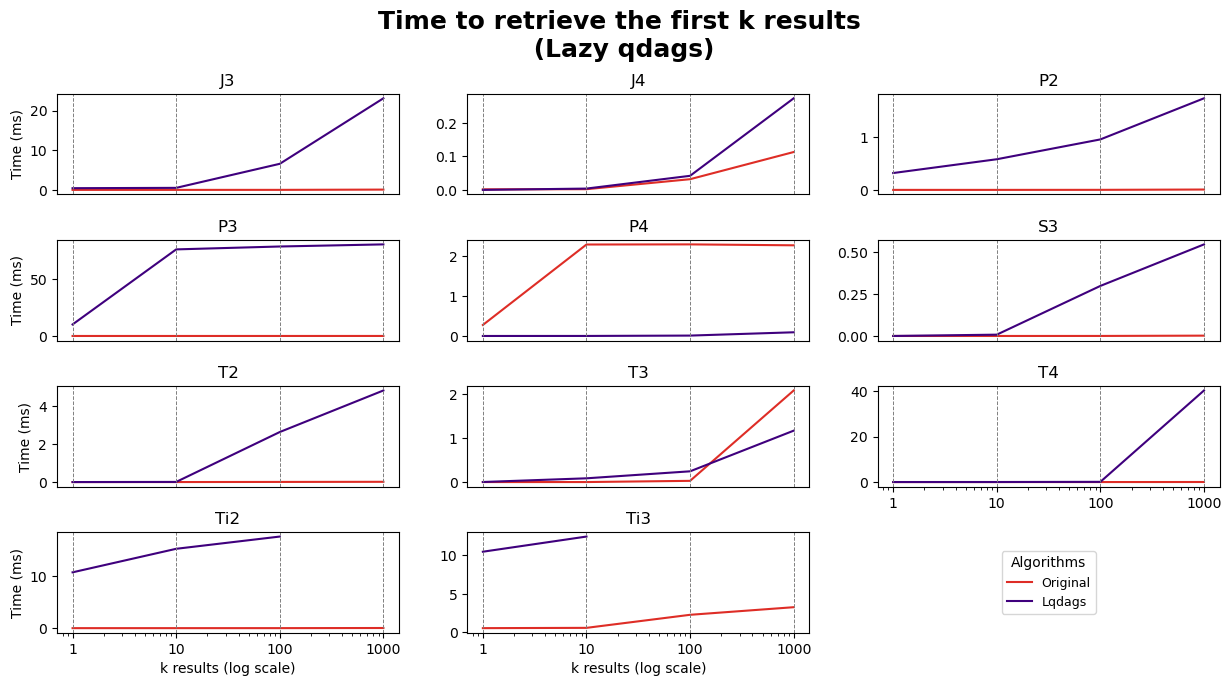

In [87]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.45, wspace=0.2)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

t2 = fig.add_subplot(gs[2, 0])
t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 2])


ti2 = fig.add_subplot(gs[3, 0])
ti3 = fig.add_subplot(gs[3, 1])
color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (ms)')
p3.set_ylabel('Time (ms)')
t2.set_ylabel('Time (ms)')
ti2.set_ylabel('Time (ms)')

ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != ti2 and query != ti3 and query != t4):
        query.axes.get_xaxis().set_visible(False)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold',y=1.0)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-time-ppt.pdf')

plt.show()
 

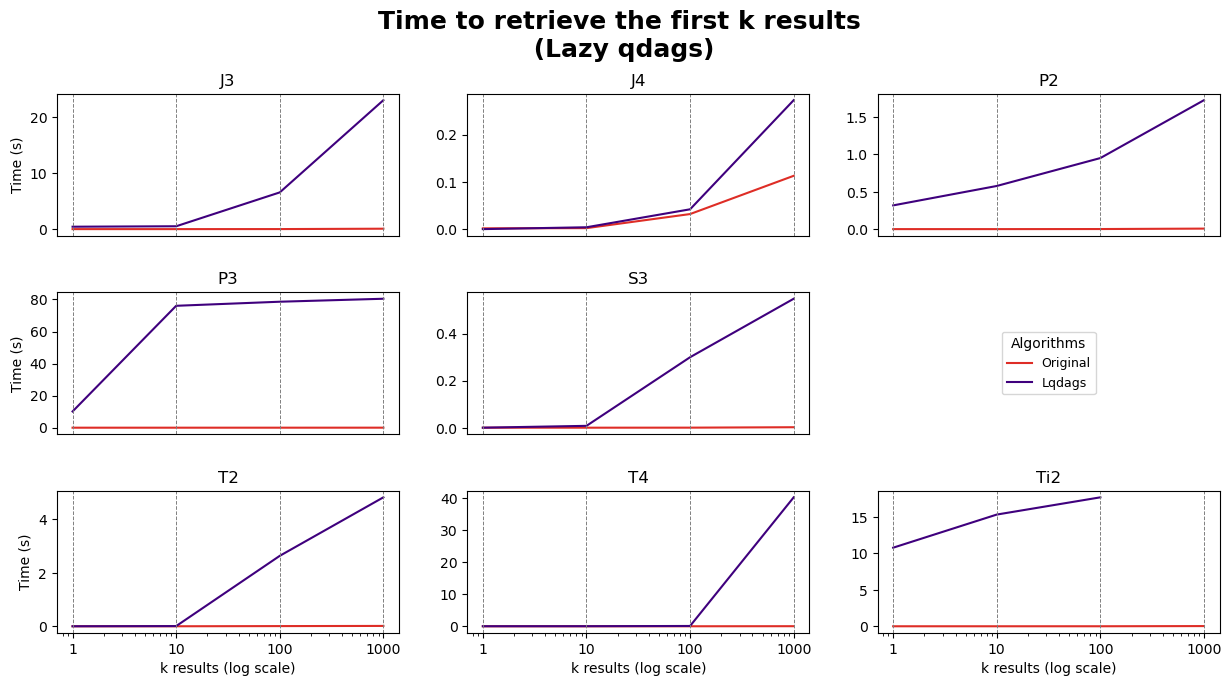

In [88]:
# ONLy
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.2)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
#p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 1])
color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

t2 = fig.add_subplot(gs[2, 0])
#t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 1])


ti2 = fig.add_subplot(gs[2, 2])
#ti3 = fig.add_subplot(gs[3, 1])
#color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
#color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
t2.set_ylabel('Time (s)')
#ti2.set_ylabel('Nodes visited')

t2.set_xlabel('k results (log scale)')
t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
#ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title_v1000[i])
        query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
        query.xaxis.set_major_formatter(LogFormatter())
        #query.yaxis.set_major_formatter(LogFormatter())
        if(query != ti2 and query != t2 and query != t4):
            query.axes.get_xaxis().set_visible(False)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold',y=1.0)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-time-ppt.pdf')

plt.show()
 

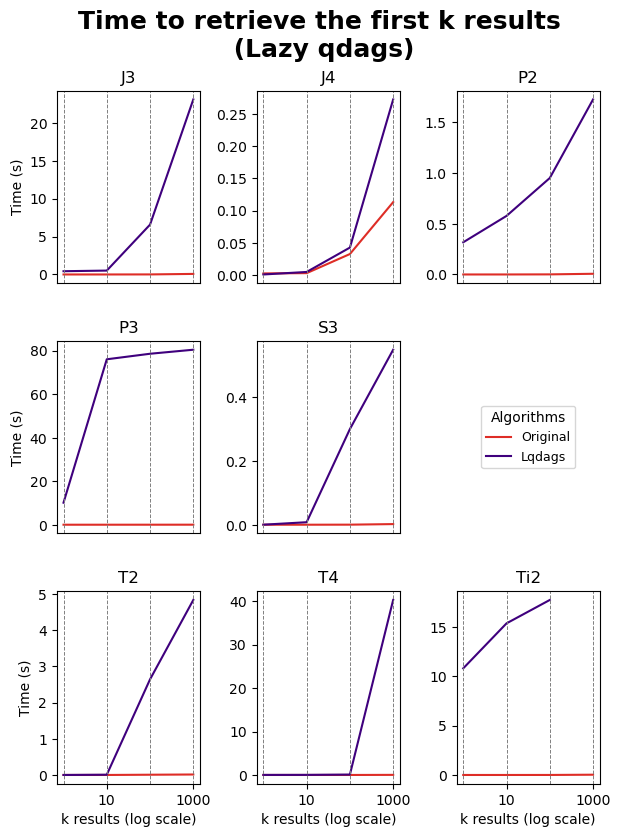

In [89]:
# ONLy
# Crear la figura
fig = plt.figure(figsize=(7,9))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
#p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 1])
color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

t2 = fig.add_subplot(gs[2, 0])
#t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 1])


ti2 = fig.add_subplot(gs[2, 2])
#ti3 = fig.add_subplot(gs[3, 1])
#color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
#color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
t2.set_ylabel('Time (s)')
#ti2.set_ylabel('Nodes visited')

t2.set_xlabel('k results (log scale)')
t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
#ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title_v1000[i])
        query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
        query.xaxis.set_major_formatter(LogFormatter())
        #query.yaxis.set_major_formatter(LogFormatter())
        if(query != ti2 and query != t2 and query != t4):
            query.axes.get_xaxis().set_visible(False)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold',y=0.97)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-time-tesis.pdf')

plt.show()
 